In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("data/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
# Preprocessing: Encode categorical features
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [45]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [46]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[68,  9],
       [19, 88]], dtype=int64)

In [54]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.9072164948453608

In [55]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.822429906542056

In [56]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.8627450980392157

In [57]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9008374802767326

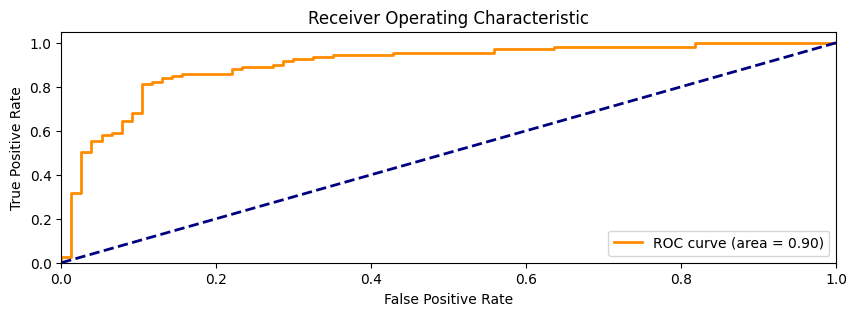

In [60]:
# Plot ROC curve
plt.figure(figsize=(10, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.15217391304347827